In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re
from numpy.random import normal
import warnings
from scipy.stats import kurtosis, skew
import math
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import statsmodels.formula.api as smf

In [593]:
df=pd.read_csv('kc_house_data.csv')

In [594]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [595]:
#we realize the id, date columns are unnecessery. So we just drop them first
df.drop(['id','date'], axis=1, inplace=True)

In [596]:
#check for the shape of data
df.shape

(21597, 19)

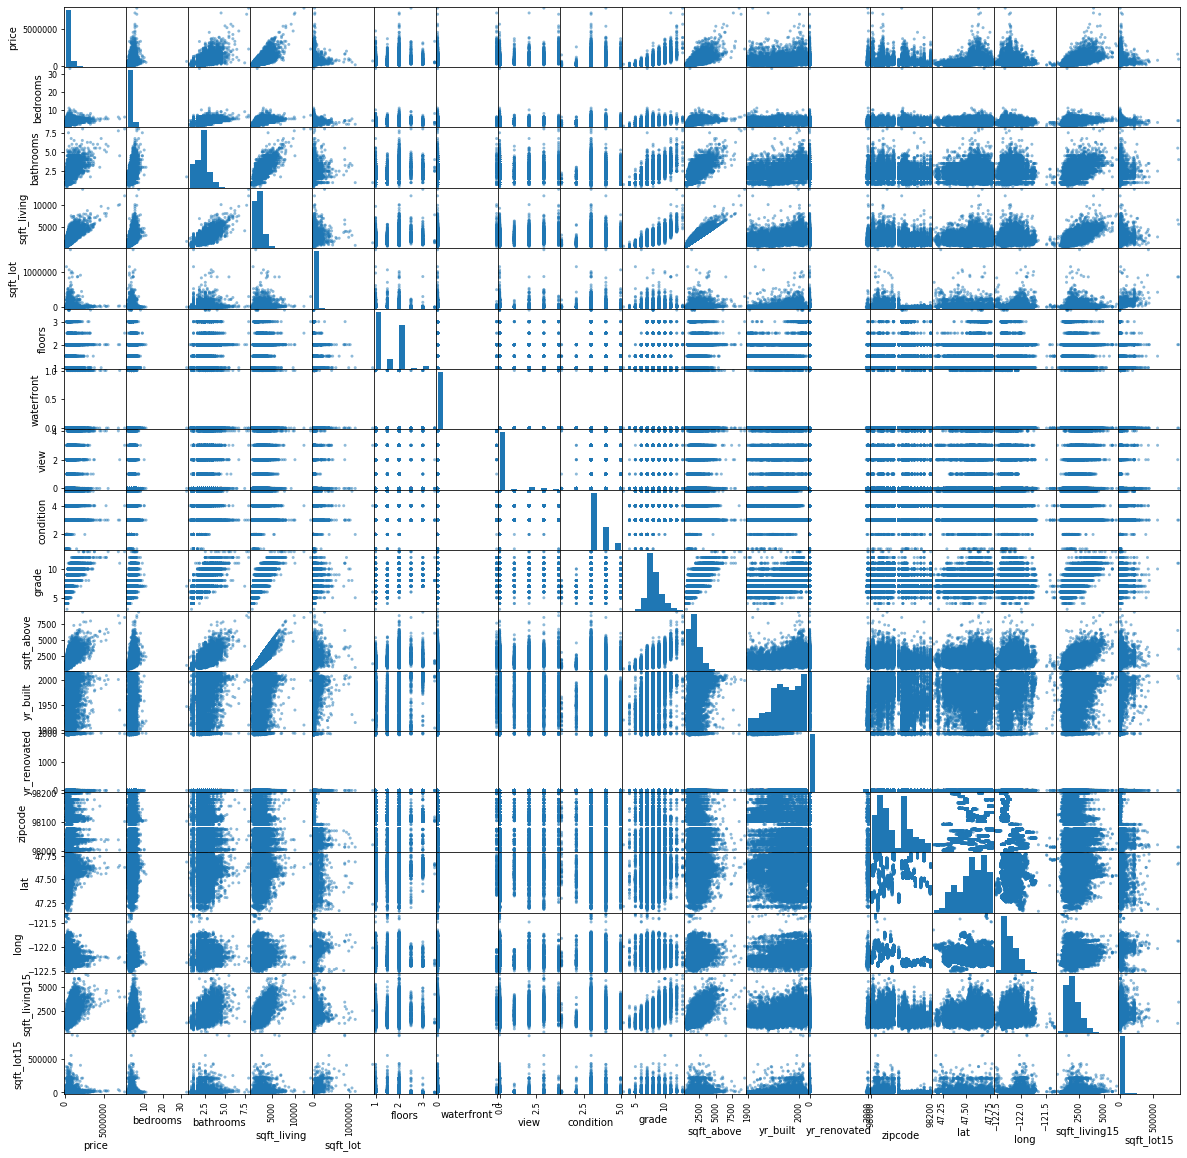

In [460]:
#plot the matrix scatter plot of the data. So we can see the relationship between 'price' and independent variables
pd.plotting.scatter_matrix(df, figsize=[20,20])
plt.show()

In [461]:
#This plot gives me a lot of information. I can see which variables, with price on the y axis, may have linear relationships with price. 
#I can also look on the diagonal and see histograms showing the distribution for each of the variables.
#I can see that variables like grade are very close to normally distributed
#Price, bedrooms, bathrooms, sqft_living all look to be right skewed
#On initial look, the variables with potential linear relationships with price are, bedrooms, bathrooms, sqft_above, sqft_living, sqft_living15, grade

In [462]:
df.describe()
#On this table I can see some outliers in the columns. Such as 33rooms in bedrooms, 8 rooms in bathrooms, 13.540 on sqft_living ...

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [597]:
df.price.value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

In [464]:
for i in range(90, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000002
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [598]:
#remove outliers on price
df=df[df['price']<=1260000]

In [599]:
df.bedrooms.value_counts()

3     9664
4     6461
2     2744
5     1389
6      238
1      196
7       32
8        9
9        4
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [600]:
#There are some outliers on 7, 8 - 10 rooms. So, I decided to cut it off.
df=df[df.bedrooms<7]

In [601]:
df.bathrooms.value_counts()

2.50    5265
1.00    3848
1.75    3027
2.25    1984
2.00    1916
1.50    1437
2.75    1127
3.00     684
3.50     580
3.25     458
3.75      99
4.00      77
0.75      71
4.50      52
4.25      36
5.00       9
1.25       8
4.75       4
0.50       4
5.25       3
6.50       1
6.00       1
5.50       1
Name: bathrooms, dtype: int64

In [602]:
#Decided to cut outliers over 4 bathsrooms, and 0.5 .75 bathrooms
df=df[df.bathrooms<4.00]
df=df[df.bathrooms !=.05]
df=df[df.bathrooms !=.75]

In [470]:
#check shape again after drop outliers
df.shape
#Data reduced about 1000 rows

(20437, 19)

In [471]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20437 entries, 0 to 21595
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20437 non-null  float64
 1   bedrooms       20437 non-null  int64  
 2   bathrooms      20437 non-null  float64
 3   sqft_living    20437 non-null  int64  
 4   sqft_lot       20437 non-null  int64  
 5   floors         20437 non-null  float64
 6   waterfront     18175 non-null  float64
 7   view           20379 non-null  float64
 8   condition      20437 non-null  int64  
 9   grade          20437 non-null  int64  
 10  sqft_above     20437 non-null  int64  
 11  sqft_basement  20437 non-null  object 
 12  yr_built       20437 non-null  int64  
 13  yr_renovated   16813 non-null  float64
 14  zipcode        20437 non-null  int64  
 15  lat            20437 non-null  float64
 16  long           20437 non-null  float64
 17  sqft_living15  20437 non-null  int64  
 18  sqft_l

In [473]:
#sqft_basement is string, so I need to change it to integer, but
#Over a haft of the houses does not have basement, and '?' value. So I just decided to drop sqft_basement 
df.sqft_basement.value_counts()

0.0       12375
?           430
600.0       208
500.0       203
700.0       199
          ...  
1135.0        1
172.0         1
2300.0        1
65.0          1
1710.0        1
Name: sqft_basement, Length: 265, dtype: int64

In [474]:
df.yr_renovated.value_counts()
#yr_renovated also have 3/4 of null data. I decided to drop it

0.0       16185
2014.0       66
2013.0       27
2000.0       25
2007.0       24
          ...  
1951.0        1
1976.0        1
1944.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [591]:
df.drop(['sqft_basement','yr_renovated'], axis=1, inplace=True)


KeyError: "['sqft_basement' 'yr_renovated'] not found in axis"

In [603]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [605]:
df.floors.value_counts()

1.0    10405
2.0     7502
1.5     1838
3.0      570
2.5      116
3.5        6
Name: floors, dtype: int64

In [488]:
df.to_csv('cleandata.csv')

In [477]:
#Checking for duplicate
df.duplicated().sum()

4

In [478]:
df.drop_duplicates(inplace=True)

In [479]:
#checking for the null values
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2262
view               58
condition           0
grade               0
sqft_above          0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [480]:
df.waterfront.value_counts()

0.0    18116
1.0       55
Name: waterfront, dtype: int64

In [481]:
df.view.value_counts()

0.0    18745
2.0      815
3.0      368
1.0      281
4.0      166
Name: view, dtype: int64

In [482]:
#Because the values of waterfront and view are almost 0, so I decided to fill with 0.
df=df.fillna(0)

In [483]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [349]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [225]:
#Check for the first mulcollinearity.
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.297685,0.451213,0.629745,0.087255,0.268402,0.072975,0.267093,0.039274,0.641147,0.532597,0.051753,-0.019782,0.420388,0.060852,0.571018,0.077178
bedrooms,0.297685,1.000000,0.487136,0.594010,0.026404,0.155105,-0.029700,0.044270,0.027824,0.332143,0.471133,0.169499,-0.162521,-0.035590,0.154346,0.393487,0.025396
bathrooms,0.451213,0.487136,1.000000,0.705469,0.061207,0.506602,-0.002114,0.100305,-0.137015,0.617161,0.627803,0.555043,-0.215448,-0.007350,0.256078,0.531670,0.062456
sqft_living,0.629745,0.594010,0.705469,1.000000,0.153577,0.336228,0.006214,0.183030,-0.069130,0.712412,0.850731,0.348889,-0.206813,0.018355,0.286532,0.745271,0.168029
sqft_lot,0.087255,0.026404,0.061207,0.153577,1.000000,-0.019900,0.024960,0.072831,-0.004567,0.090276,0.161650,0.042038,-0.129448,-0.095296,0.223873,0.140448,0.702113
floors,0.268402,0.155105,0.506602,0.336228,-0.019900,1.000000,-0.002166,-0.013666,-0.275235,0.453239,0.527619,0.505732,-0.062846,0.038891,0.133404,0.263824,-0.025204
waterfront,0.072975,-0.029700,-0.002114,0.006214,0.024960,-0.002166,1.000000,0.280070,0.003728,-0.002054,-0.005913,-0.034181,0.047250,-0.034907,-0.048973,0.015292,0.029936
view,0.267093,0.044270,0.100305,0.183030,0.072831,-0.013666,0.280070,1.000000,0.033971,0.149237,0.075267,-0.069233,0.101329,-0.020030,-0.076390,0.201996,0.070474
condition,0.039274,0.027824,-0.137015,-0.069130,-0.004567,-0.275235,0.003728,0.033971,1.000000,-0.168182,-0.176663,-0.354906,-0.004627,-0.018142,-0.100192,-0.113829,0.000836
grade,0.641147,0.332143,0.617161,0.712412,0.090276,0.453239,-0.002054,0.149237,-0.168182,1.000000,0.712938,0.482427,-0.185893,0.093318,0.228717,0.677473,0.100527


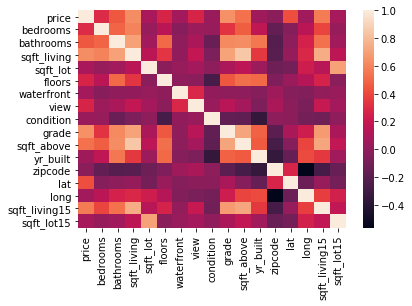

In [226]:
#There are some couple of independent over .65. That is not good for our model
sns.heatmap(df.corr());

In [227]:
#It is hard to see what couples are over 0.65, Just create a table with values overs>0.65 and <1
coral = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
coral['pairs'] = list(zip(coral.level_0, coral.level_1))
coral.set_index(['pairs'], inplace = True)
coral.drop(columns=['level_1', 'level_0'], inplace = True)
# cc for correlation coefficient
coral.columns = ['cc']
coral.drop_duplicates(inplace=True)
coral[(coral.cc>.65) & (coral.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.850731
"(sqft_living15, sqft_living)",0.745271
"(sqft_living15, sqft_above)",0.720191
"(sqft_above, grade)",0.712938
"(sqft_living, grade)",0.712412
"(bathrooms, sqft_living)",0.705469
"(sqft_lot15, sqft_lot)",0.702113
"(grade, sqft_living15)",0.677473


# Baseline model

In [229]:
outcome='price'
new_x_cols=[col for col in df.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2998.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:32:21   Log-Likelihood:            -2.6806e+05
No. Observations:               20433   AIC:                         5.361e+05
Df Residuals:                   20416   BIC:                         5.363e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.542e+06   1.81e+06     -3.066      0.002   -9.09e+06      -2e+06
bedrooms       -1.24e+04   1287.786     -9.626      0.000   -1.49e+04   -9872.198
bathrooms      2.796e+04   2138.715     13.072      0.000    2.38e+04    3.22e+04
sqft_living      78.2979      2.936     26.665      0.000      72.542      84.053
sqft_lot          0.2189      0.030      7.232      0.000       0.160       0.278
floors         3.344e+04   2273.685     14.707      0.000     2.9e+04    3.79e+04
waterfront     1.822e+05    1.7e+04     10.712      0.000    1.49e+05    2.16e+05
view            3.52e+04   1426.016     24.684      0.000    3.24e+04     3.8e+04
condition      2.574e+04   1435.565     17.928      0.000    2.29e+04    2.86e+04
grade          7.787e+04   1376.529     56.572      0.000    7.52e+04    8.06e+04
sqft_above        1.3782      2.882      0.478      0.633      -4.271       7.028
yr_built      -2008.9800     43.755    -45.914      0.000   -2094.744   -1923.216
zipcode        -259.5486     20.409    -12.718      0.000    -299.551    -219.546
lat            5.508e+05   6535.802     84.268      0.000    5.38e+05    5.64e+05
long          -6.751e+04   8097.109     -8.338      0.000   -8.34e+04   -5.16e+04
sqft_living15    47.4994      2.297     20.680      0.000      42.997      52.002
sqft_lot15       -0.1340      0.047     -2.854      0.004      -0.226      -0.042
==============================================================================
Omnibus:                     2323.837   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5047.464
Skew:                           0.704   Prob(JB):                         0.00
Kurtosis:                       4.987   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [230]:
#It looks good on the first model with hight P-value :.701, slow skew:0.7 and only a independent variable over alpha:0.05

In [231]:
#make X,y to put in the train-test split
y=df.price
X=df.drop('price', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)


train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

16346 4087
Train Mean Squared Error 14654311221.44218
Test Mean Squared Error 14063643762.18672
Root Train Mean Squared Error 121054.99255066756
Root Test Mean Squared Error 118590.23468307464


Text(0.5, 1.0, 'QQplot')

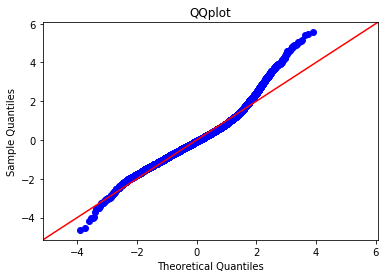

In [232]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQplot')

In [233]:
#The residual does not fit perfectly on the line. The outliers in the tail that tell us 
#It is a right skewed (or positive skewed). May need to log transform to solve it.

# Second model

Dealing with categorical variable

In [234]:
#to prevent my data, I set data on second model is df2
df2=df

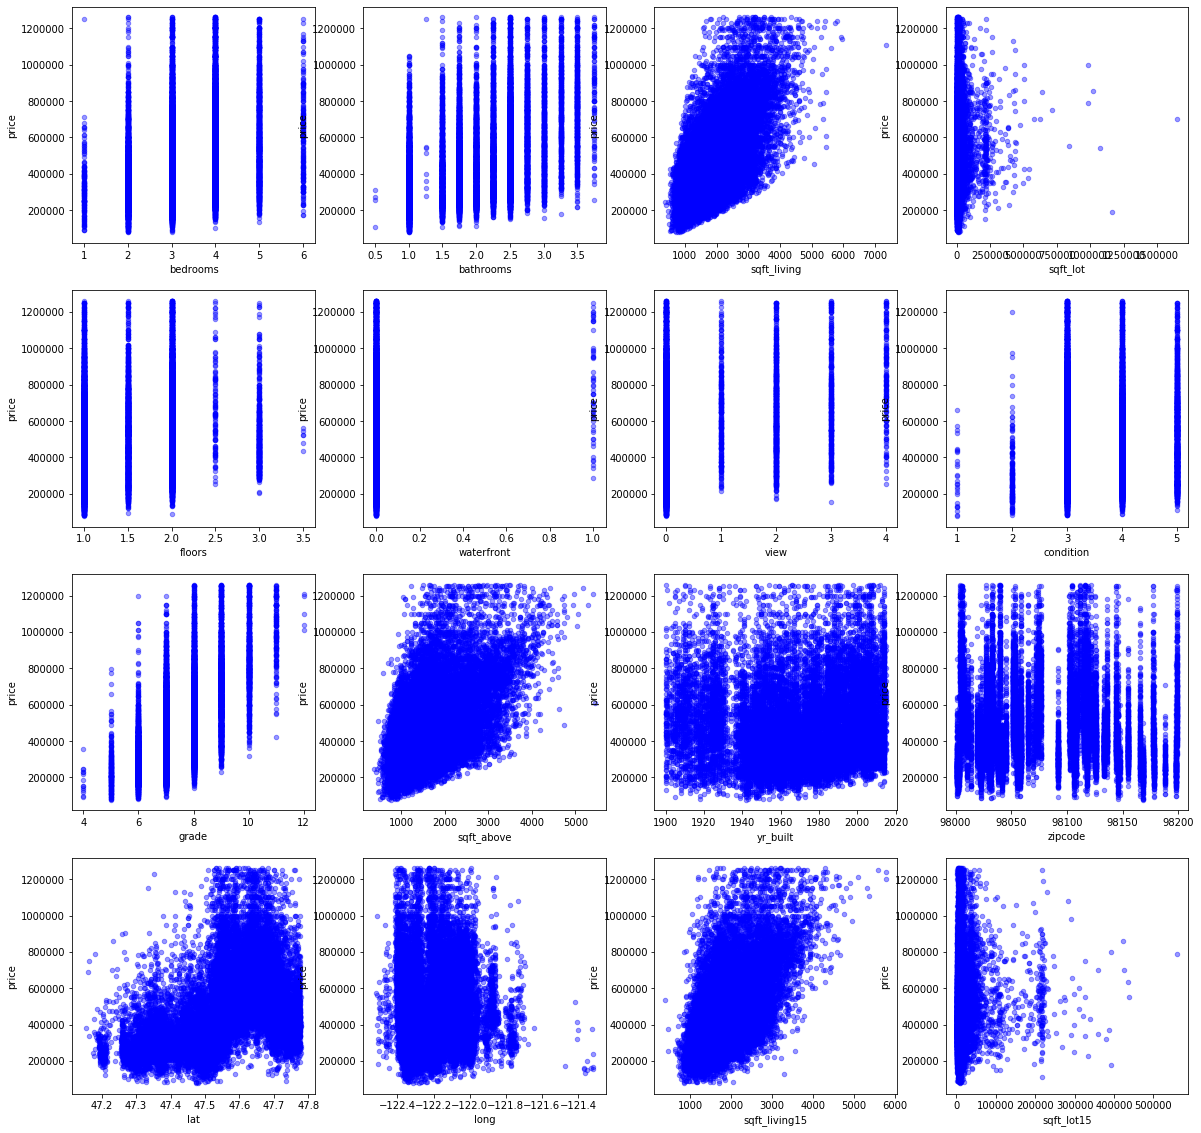

In [235]:
fig, axes = plt.subplots(nrows=len(df2.columns)//4, ncols=4, figsize=(20,20))

for xcol, ax in zip(df2.columns[1:], axes.flatten()): #(nho bo flatten sau axes de dinh dang)
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [238]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [250]:
#Base on the scatter plot, I can see which are categorical variable
cates=['bedrooms','bathrooms','floors','view','condition','grade']
#waterfront only has 2 value 0 and 1. I think I do not need to make it dummy

In [259]:
bedr=pd.get_dummies(df2.bedrooms, prefix='bedr', drop_first=True)
bath=pd.get_dummies(df2.bathrooms, prefix='bath', drop_first=True)
con=pd.get_dummies(df2.condition, prefix='con', drop_first=True)
view=pd.get_dummies(df2.bedrooms, prefix='view', drop_first=True)
grade=pd.get_dummies(df2.bedrooms, prefix='gra', drop_first=True)

In [261]:
df2.drop(cates,axis=1,inplace=True)

In [263]:
df2=pd.concat([df2,bedr,bath,con,view,grade], axis=1)

In [264]:
df2

,price,sqft_living,sqft_lot,waterfront,sqft_above,yr_built,zipcode,lat,long,sqft_living15,...,view_2,view_3,view_4,view_5,view_6,gra_2,gra_3,gra_4,gra_5,gra_6
0,221900.0,1180,5650,0.0,1180,1955,98178,47.5112,-122.257,1340,...,0,1,0,0,0,0,1,0,0,0
1,538000.0,2570,7242,0.0,2170,1951,98125,47.7210,-122.319,1690,...,0,1,0,0,0,0,1,0,0,0
2,180000.0,770,10000,0.0,770,1933,98028,47.7379,-122.233,2720,...,1,0,0,0,0,1,0,0,0,0
3,604000.0,1960,5000,0.0,1050,1965,98136,47.5208,-122.393,1360,...,0,0,1,0,0,0,0,1,0,0
4,510000.0,1680,8080,0.0,1680,1987,98074,47.6168,-122.045,1800,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,1010000.0,3510,7200,0.0,2600,2009,98136,47.5537,-122.398,2050,...,0,0,1,0,0,0,0,1,0,0
21591,475000.0,1310,1294,0.0,1180,2008,98116,47.5773,-122.409,1330,...,0,1,0,0,0,0,1,0,0,0
21592,360000.0,1530,1131,0.0,1530,2009,98103,47.6993,-122.346,1530,...,0,1,0,0,0,0,1,0,0,0
21593,400000.0,2310,5813,0.0,2310,2014,98146,47.5107,-122.362,1830,...,0,0,1,0,0,0,0,1,0,0


In [266]:
#adjust columns names to fit in the model
df2.columns=df2.columns.map(lambda x: x.replace('.','_').replace(',','_').replace('[','').replace(']','').replace('(','').replace(')',''))

In [287]:
df2.corr()

,price,sqft_living,sqft_lot,waterfront,sqft_above,yr_built,zipcode,lat,long,sqft_living15,...,view_2,view_3,view_4,view_5,view_6,gra_2,gra_3,gra_4,gra_5,gra_6
price,1.000000,0.629745,0.087255,0.072975,0.532597,0.051753,-0.019782,0.420388,0.060852,0.571018,...,-0.158437,-0.168800,0.227897,0.132828,0.055942,-0.158437,-0.168800,0.227897,0.132828,0.055942
sqft_living,0.629745,1.000000,0.153577,0.006214,0.850731,0.348889,-0.206813,0.018355,0.286532,0.745271,...,-0.381784,-0.247337,0.404846,0.266635,0.113224,-0.381784,-0.247337,0.404846,0.266635,0.113224
sqft_lot,0.087255,0.153577,1.000000,0.024960,0.161650,0.042038,-0.129448,-0.095296,0.223873,0.140448,...,-0.027627,-0.004323,0.020325,0.004982,0.006014,-0.027627,-0.004323,0.020325,0.004982,0.006014
waterfront,0.072975,0.006214,0.024960,1.000000,-0.005913,-0.034181,0.047250,-0.034907,-0.048973,0.015292,...,0.029729,-0.005538,-0.018740,-0.006009,0.004393,0.029729,-0.005538,-0.018740,-0.006009,0.004393
sqft_above,0.532597,0.850731,0.161650,-0.005913,1.000000,0.457661,-0.273064,-0.037662,0.391935,0.720191,...,-0.330489,-0.192027,0.372383,0.161479,0.055732,-0.330489,-0.192027,0.372383,0.161479,0.055732
yr_built,0.051753,0.348889,0.042038,-0.034181,0.457661,1.000000,-0.345298,-0.154280,0.411903,0.351855,...,-0.206773,0.033668,0.131679,0.017696,-0.040271,-0.206773,0.033668,0.131679,0.017696,-0.040271
zipcode,-0.019782,-0.206813,-0.129448,0.047250,-0.273064,-0.345298,1.000000,0.275982,-0.564815,-0.282717,...,0.203132,-0.037540,-0.104515,-0.025378,0.001408,0.203132,-0.037540,-0.104515,-0.025378,0.001408
lat,0.420388,0.018355,-0.095296,-0.034907,-0.037662,-0.154280,0.275982,1.000000,-0.135564,0.025512,...,0.088302,-0.049810,-0.025877,0.019383,0.012942,0.088302,-0.049810,-0.025877,0.019383,0.012942
long,0.060852,0.286532,0.223873,-0.048973,0.391935,0.411903,-0.564815,-0.135564,1.000000,0.367068,...,-0.180580,0.007945,0.124837,0.021399,-0.020466,-0.180580,0.007945,0.124837,0.021399,-0.020466
sqft_living15,0.571018,0.745271,0.140448,0.015292,0.720191,0.351855,-0.282717,0.025512,0.367068,1.000000,...,-0.273271,-0.174964,0.316740,0.149765,0.028278,-0.273271,-0.174964,0.316740,0.149765,0.028278


In [288]:
coral = df2.corr().abs().stack().reset_index().sort_values(0, ascending=False)
coral['pairs'] = list(zip(coral.level_0, coral.level_1))
coral.set_index(['pairs'], inplace = True)
coral.drop(columns=['level_1', 'level_0'], inplace = True)
# cc for correlation coefficient
coral.columns = ['cc']
coral.drop_duplicates(inplace=True)
coral[(coral.cc>.65) & (coral.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.850731
"(con_4, con_3)",0.816775
"(sqft_living15, sqft_living)",0.745271
"(sqft_above, sqft_living15)",0.720191
"(sqft_lot, sqft_lot15)",0.702113


In [290]:
#to prevent multicollinearrity, I decided to drop con_4, sqft_living15, sqft_above, sqft_lot15
df2.drop(['con_4', 'sqft_living15', 'sqft_above', 'sqft_lot15'], axis=1, inplace=True)

In [291]:
train, test =train_test_split(df2,test_size=0.2, random_state=40)

In [292]:
print (train.shape)
test.shape

(16346, 38)


(4087, 38)

In [293]:
outcome='price'
x_cols=[col for col in df2.columns]
x_cols.remove('price')
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     923.5
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:03:16   Log-Likelihood:            -2.1686e+05
No. Observations:               16346   AIC:                         4.338e+05
Df Residuals:                   16318   BIC:                         4.340e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.392e+06   2.27e+06     -4.136      0.000   -1.38e+07   -4.94e+06
sqft_living   183.8617      2.297     80.030      0.000     179.359     188.365
sqft_lot        0.1776      0.029      6.134      0.000       0.121       0.234
waterfront   2.846e+05    2.2e+04     12.917      0.000    2.41e+05    3.28e+05
yr_built    -1208.9291     54.971    -21.992      0.000   -1316.678   -1101.180
zipcode      -318.4108     26.414    -12.055      0.000    -370.185    -266.636
lat          6.317e+05   8306.433     76.048      0.000    6.15e+05    6.48e+05
long        -1.062e+05   1.01e+04    -10.489      0.000   -1.26e+05   -8.63e+04
bedr_2       3360.9786   4180.806      0.804      0.421   -4833.858    1.16e+04
bedr_3      -6860.8287   4152.213     -1.652      0.098    -1.5e+04    1277.963
bedr_4      -1.512e+04   4235.231     -3.570      0.000   -2.34e+04   -6817.933
bedr_5      -3.024e+04   4468.832     -6.767      0.000    -3.9e+04   -2.15e+04
bedr_6      -4.106e+04   5580.389     -7.359      0.000    -5.2e+04   -3.01e+04
bath_1_0     9.817e+04   7.01e+04      1.401      0.161   -3.92e+04    2.36e+05
bath_1_25    1.938e+05   8.78e+04      2.207      0.027    2.17e+04    3.66e+05
bath_1_5      1.21e+05   7.02e+04      1.724      0.085   -1.66e+04    2.59e+05
bath_1_75    1.191e+05   7.01e+04      1.699      0.089   -1.83e+04    2.57e+05
bath_2_0     1.282e+05   7.01e+04      1.827      0.068   -9349.804    2.66e+05
bath_2_25    1.497e+05   7.02e+04      2.134      0.033    1.22e+04    2.87e+05
bath_2_5     1.648e+05   7.01e+04      2.350      0.019    2.73e+04    3.02e+05
bath_2_75    1.733e+05   7.03e+04      2.466      0.014    3.55e+04    3.11e+05
bath_3_0     1.752e+05   7.04e+04      2.490      0.013    3.73e+04    3.13e+05
bath_3_25    2.259e+05   7.06e+04      3.202      0.001    8.76e+04    3.64e+05
bath_3_5     2.285e+05   7.05e+04      3.240      0.001    9.03e+04    3.67e+05
bath_3_75    2.797e+05   7.19e+04      3.889      0.000    1.39e+05    4.21e+05
con_2       -5.737e+04   1.23e+04     -4.665      0.000   -8.15e+04   -3.33e+04
con_3       -1.312e+04   2742.880     -4.783      0.000   -1.85e+04   -7741.576
con_5        2.765e+04   4560.009      6.064      0.000    1.87e+04    3.66e+04
view_2       3360.9786   4180.806      0.804      0.421   -4833.858    1.16e+04
view_3      -6860.8287   4152.213     -1.652      0.098    -1.5e+04    1277.963
view_4      -1.512e+04   4235.231     -3.570      0.000   -2.34e+04   -6817.933
view_5      -3.024e+04   4468.832     -6.767      0.000    -3.9e+04   -2.15e+04
view_6      -4.106e+04   5580.389     -7.359      0.000    -5.2e+04   -3.01e+04
gra_2        3360.9786   4180.806      0.804      0.421   -4833.858    1.16e+04
gra_3       -6860.8287   4152.213     -1.652      0.098    -1.5e+04    1277.963
gra_4       -1.512e+04   4235.231     -3.57

In [ ]:
#Remove the Uninfluential Features

In [294]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

38 27
['sqft_living', 'sqft_lot', 'waterfront', 'yr_built', 'zipcode']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-9.392e+06,2.27e+06,-4.136,0.0,-1.38e+07,-4.94e+06
sqft_living,183.8617,2.297,80.030,0.0,179.359,188.365
sqft_lot,0.1776,0.029,6.134,0.0,0.121,0.234
waterfront,2.846e+05,2.2e+04,12.917,0.0,2.41e+05,3.28e+05
yr_built,-1208.9291,54.971,-21.992,0.0,-1316.678,-1101.180


In [295]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1176.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:03:31   Log-Likelihood:            -2.1691e+05
No. Observations:               16346   AIC:                         4.339e+05
Df Residuals:                   16324   BIC:                         4.340e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.114e+07   2.26e+06     -4.919      0.000   -1.56e+07    -6.7e+06
sqft_living   184.5087      2.170     85.016      0.000     180.255     188.763
sqft_lot        0.1823      0.029      6.285      0.000       0.125       0.239
waterfront   2.913e+05   2.21e+04     13.197      0.000    2.48e+05    3.35e+05
yr_built    -1135.4080     53.089    -21.387      0.000   -1239.468   -1031.348
zipcode      -309.9428     26.413    -11.735      0.000    -361.714    -258.171
lat          6.381e+05   8297.859     76.905      0.000    6.22e+05    6.54e+05
long        -1.108e+05   1.01e+04    -10.941      0.000   -1.31e+05   -9.09e+04
bedr_4      -9061.6728    932.786     -9.715      0.000   -1.09e+04   -7233.310
bedr_5      -2.401e+04   1674.206    -14.341      0.000   -2.73e+04   -2.07e+04
bedr_6      -3.447e+04   3754.667     -9.181      0.000   -4.18e+04   -2.71e+04
bath_1_25    8.482e+04   5.32e+04      1.595      0.111   -1.94e+04    1.89e+05
bath_2_25    2.981e+04   4150.335      7.183      0.000    2.17e+04    3.79e+04
bath_2_5     4.374e+04   3588.457     12.188      0.000    3.67e+04    5.08e+04
bath_2_75    5.236e+04   5491.735      9.534      0.000    4.16e+04    6.31e+04
bath_3_0     5.393e+04   6690.401      8.061      0.000    4.08e+04     6.7e+04
bath_3_25     1.03e+05   8326.488     12.372      0.000    8.67e+04    1.19e+05
bath_3_5     1.054e+05   7827.047     13.461      0.000       9e+04    1.21e+05
bath_3_75    1.569e+05   1.61e+04      9.722      0.000    1.25e+05    1.89e+05
con_2       -5.662e+04   1.23e+04     -4.598      0.000   -8.08e+04   -3.25e+04
con_3       -1.283e+04   2739.613     -4.685      0.000   -1.82e+04   -7464.129
con_5         2.98e+04   4551.460      6.547      0.000    2.09e+04    3.87e+04
view_4      -9061.6728    932.786     -9.715      0.000   -1.09e+04   -7233.310
view_5      -2.401e+04   1674.206    -14.341      0.000   -2.73e+04   -2.07e+04
view_6      -3.447e+04   3754.667     -9.181      0.000   -4.18e+04   -2.71e+04
gra_4       -9061.6728    932.786     -9.715      0.000   -1.09e+04   -7233.310
gra_5       -2.401e+04   1674.206    -14.341      0.000   -2.73e+04   -2.07e+04
gra_6       -3.447e+04   3754.667     -9.181      0.000   -4.18e+04   -2.71e+04
==============================================================================
Omnibus:                     1719.535   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3288.716
Skew:                           0.698   Prob(JB):                         0.00
Kurtosis:                       4.697   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalu

In [296]:
#There are still some high P_value, continue drop variable with high p_value
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

28 26
['sqft_living', 'sqft_lot', 'waterfront', 'yr_built', 'zipcode']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-1.114e+07,2.26e+06,-4.919,0.0,-1.56e+07,-6.7e+06
sqft_living,184.5087,2.170,85.016,0.0,180.255,188.763
sqft_lot,0.1823,0.029,6.285,0.0,0.125,0.239
waterfront,2.913e+05,2.21e+04,13.197,0.0,2.48e+05,3.35e+05
yr_built,-1135.4080,53.089,-21.387,0.0,-1239.468,-1031.348


In [297]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1235.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:04:05   Log-Likelihood:            -2.1691e+05
No. Observations:               16346   AIC:                         4.339e+05
Df Residuals:                   16325   BIC:                         4.340e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.117e+07   2.26e+06     -4.932      0.000   -1.56e+07   -6.73e+06
sqft_living   184.5052      2.170     85.011      0.000     180.251     188.759
sqft_lot        0.1821      0.029      6.276      0.000       0.125       0.239
waterfront   2.934e+05    2.2e+04     13.313      0.000     2.5e+05    3.37e+05
yr_built    -1133.3973     53.076    -21.354      0.000   -1237.433   -1029.362
zipcode      -309.6846     26.413    -11.725      0.000    -361.458    -257.911
lat          6.383e+05   8297.658     76.926      0.000    6.22e+05    6.55e+05
long        -1.107e+05   1.01e+04    -10.936      0.000   -1.31e+05   -9.09e+04
bedr_4      -9070.1323    932.815     -9.723      0.000   -1.09e+04   -7241.713
bedr_5      -2.402e+04   1674.280    -14.344      0.000   -2.73e+04   -2.07e+04
bedr_6      -3.448e+04   3754.844     -9.182      0.000   -4.18e+04   -2.71e+04
bath_2_25    2.971e+04   4150.012      7.159      0.000    2.16e+04    3.78e+04
bath_2_5     4.362e+04   3587.921     12.158      0.000    3.66e+04    5.07e+04
bath_2_75    5.226e+04   5491.658      9.517      0.000    4.15e+04     6.3e+04
bath_3_0     5.384e+04   6690.459      8.047      0.000    4.07e+04    6.69e+04
bath_3_25    1.029e+05   8326.538     12.358      0.000    8.66e+04    1.19e+05
bath_3_5     1.052e+05   7827.078     13.446      0.000    8.99e+04    1.21e+05
bath_3_75    1.568e+05   1.61e+04      9.716      0.000    1.25e+05    1.88e+05
con_2        -5.67e+04   1.23e+04     -4.605      0.000   -8.08e+04   -3.26e+04
con_3        -1.29e+04   2739.387     -4.711      0.000   -1.83e+04   -7534.924
con_5        2.975e+04   4551.548      6.535      0.000    2.08e+04    3.87e+04
view_4      -9070.1323    932.815     -9.723      0.000   -1.09e+04   -7241.713
view_5      -2.402e+04   1674.280    -14.344      0.000   -2.73e+04   -2.07e+04
view_6      -3.448e+04   3754.844     -9.182      0.000   -4.18e+04   -2.71e+04
gra_4       -9070.1323    932.815     -9.723      0.000   -1.09e+04   -7241.713
gra_5       -2.402e+04   1674.280    -14.344      0.000   -2.73e+04   -2.07e+04
gra_6       -3.448e+04   3754.844     -9.182      0.000   -4.18e+04   -2.71e+04
==============================================================================
Omnibus:                     1724.328   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3300.000
Skew:                           0.699   Prob(JB):                         0.00
Kurtosis:                       4.700   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-18. This might indicate that there are
strong multicollinearity proble

In [298]:
# I set my train and test variables and fit my training set to the model
X_train = train[x_cols]
y_train = train['price']
X_test = test[x_cols]
y_test = test['price']

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)


train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 19663634676.070812
Test Mean Squared Error 17757749606.373737
Root Train Mean Squared Error 140227.0825342623
Root Test Mean Squared Error 133258.20652542842


After modeling the second model, the R_squared is lower and the rmse is higher compare with the base model

# Third Model

On the third model, I decided to bin lat, long and every categorical variables

In [657]:
#to prevent my data, set df3=df2
df3=pd.read_csv('cleandata.csv')

In [658]:
df3.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [659]:
bins=[47.1559,47.46275,47.6795,47.7776]
bins_lat=pd.cut(df3['lat'], bins)
bins_lat=bins_lat.cat.as_ordered()
df3.lat=bins_lat
df3.lat=df3.lat.cat.codes
lat_dummies=pd.get_dummies(bins_lat, prefix='lat')

In [660]:
bins=[-122.519,-122.33,-122.123,-121.315]
bins_long=pd.cut(df3['long'], bins)
bins_long=bins_long.cat.as_ordered()
df3.long=bins_long
df3.long=df3.long.cat.codes
long_dummies=pd.get_dummies(bins_long, prefix='long')


In [661]:
bins=[0.5,2.50,7.75]
bins_bath=pd.cut(df3['bathrooms'], bins)
bins_bath=bins_bath.cat.as_ordered()
df3.bathrooms=bins_bath
df3.bathrooms=df3.bathrooms.cat.codes
bath_dummies=pd.get_dummies(bins_bath, prefix='bath')


In [662]:
df3.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900.0,3,0,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,1,1,1340,5650
1,1,538000.0,3,0,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,2,1,1690,7639
2,2,180000.0,2,0,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,2,1,2720,8062
3,3,604000.0,4,1,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,1,0,1360,5000
4,4,510000.0,3,0,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,1,2,1800,7503


In [663]:
df3.condition.value_counts()

3    13250
4     5427
5     1565
2      164
1       27
Name: condition, dtype: int64

In [664]:
bins=[3,7,12]
bins_grade=pd.cut(df3['grade'], bins)
bins_grade=bins_grade.cat.as_ordered()
df3.grade=bins_grade
df3.grade=df3.grade.cat.codes
grade_dummies=pd.get_dummies(bins_grade, prefix='grade')


In [665]:
bins=[1.00,3.00,6]
bins_bedrooms=pd.cut(df3['bedrooms'], bins)
bins_bedrooms=bins_bedrooms.cat.as_ordered()

df3.bedrooms=bins_bedrooms
df3.bedrooms=df3.bedrooms.cat.codes
bedr_dummies=pd.get_dummies(bins_bedrooms, prefix='bedr')

In [666]:
view=pd.get_dummies(df3.bedrooms, prefix='view', drop_first=True)

In [667]:

flos=pd.get_dummies(df3.floors, prefix='flos', drop_first=True)

In [668]:
con=pd.get_dummies(df3.condition,prefix='con',drop_first=True)

In [669]:
df3=pd.concat([df3,long_dummies,bath_dummies,lat_dummies,grade_dummies,bedr_dummies,view,flos,con], axis=1)
df3.drop(['bathrooms','lat','long','grade','bedrooms','view','floors','Unnamed: 0','condition'],axis=1,inplace=True)

In [670]:
df3

,price,sqft_living,sqft_lot,waterfront,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,"long_(-122.519, -122.33]",...,view_1,flos_1.5,flos_2.0,flos_2.5,flos_3.0,flos_3.5,con_2,con_3,con_4,con_5
0,221900.0,1180,5650,0.0,1180,1955,98178,1340,5650,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,2570,7242,0.0,2170,1951,98125,1690,7639,0,...,0,0,1,0,0,0,0,1,0,0
2,180000.0,770,10000,0.0,770,1933,98028,2720,8062,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,1960,5000,0.0,1050,1965,98136,1360,5000,1,...,1,0,0,0,0,0,0,0,0,1
4,510000.0,1680,8080,0.0,1680,1987,98074,1800,7503,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,1010000.0,3510,7200,0.0,2600,2009,98136,2050,6200,1,...,1,0,1,0,0,0,0,1,0,0
20429,475000.0,1310,1294,0.0,1180,2008,98116,1330,1265,1,...,0,0,1,0,0,0,0,1,0,0
20430,360000.0,1530,1131,0.0,1530,2009,98103,1530,1509,1,...,0,0,0,0,1,0,0,1,0,0
20431,400000.0,2310,5813,0.0,2310,2014,98146,1830,7200,1,...,1,0,1,0,0,0,0,1,0,0


In [671]:
#adjust columns names to fit in the model
df3.columns=df3.columns.map(lambda x: x.replace('.','_').replace(',','_').replace('[','').replace(']','').replace('(','').replace(')','').replace(' ','').replace('-',''))

In [672]:
train, test =train_test_split(df3,test_size=0.2, random_state=40)
outcome='price'
x_cols=[col for col in df3.columns]
x_cols.remove('price')
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1194.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:35:21   Log-Likelihood:            -2.1553e+05
No. Observations:               16346   AIC:                         4.311e+05
Df Residuals:                   16318   BIC:                         4.313e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.291e+07   1.27e+06     10.155      0.000    1.04e+07    1.54e+07
sqft_living            109.1180      3.143     34.714      0.000     102.957     115.279
sqft_lot                 0.2834      0.035      8.019      0.000       0.214       0.353
waterfront            2.601e+05   2.03e+04     12.826      0.000     2.2e+05       3e+05
sqft_above              11.2291      3.399      3.304      0.001       4.567      17.891
yr_built             -1462.7199     53.986    -27.094      0.000   -1568.539   -1356.901
zipcode               -214.1730     23.516     -9.107      0.000    -260.268    -168.078
sqft_living15           77.2919      2.668     28.969      0.000      72.062      82.522
sqft_lot15              -0.1870      0.057     -3.253      0.001      -0.300      -0.074
long_122_519_122_33    4.33e+06   4.25e+05     10.199      0.000     3.5e+06    5.16e+06
long_122_33_122_123   4.298e+06   4.24e+05     10.143      0.000    3.47e+06    5.13e+06
long_122_123_121_315  4.285e+06   4.23e+05     10.123      0.000    3.46e+06    5.12e+06
bath_0_5_2_5          1.159e+05   6.46e+04      1.795      0.073   -1.07e+04    2.42e+05
bath_2_5_7_75         1.479e+05   6.46e+04      2.288      0.022    2.12e+04    2.75e+05
lat_47_156_47_463    -1.192e+05   1.29e+05     -0.923      0.356   -3.72e+05    1.34e+05
lat_47_463_47_68      7.834e+04   1.29e+05      0.607      0.544   -1.75e+05    3.31e+05
lat_47_68_47_778      6.031e+04   1.29e+05      0.467      0.640   -1.93e+05    3.13e+05
grade_3_7             6.411e+06   6.36e+05     10.084      0.000    5.17e+06    7.66e+06
grade_7_12            6.502e+06   6.36e+05     10.226      0.000    5.26e+06    7.75e+06
bedr_1_0_3_0          1.561e+04   5673.809      2.752      0.006    4491.121    2.67e+04
bedr_3_0_6_0          2539.3425   5807.249      0.437      0.662   -8843.501    1.39e+04
view_0                1.561e+04   5673.809      2.752      0.006    4491.121    2.67e+04
view_1                2539.3425   5807.249      0.437      0.662   -8843.501    1.39e+04
flos_1_5              1.866e+04   3955.551      4.717      0.000    1.09e+04    2.64e+04
flos_2_0              2.288e+04   3221.380      7.103      0.000    1.66e+04    2.92e+04
flos_2_5              7.228e+04    1.4e+04      5.168      0.000    4.49e+04    9.97e+04
flos_3_0              7.907e+04   7062.791     11.195      0.000    6.52e+04    9.29e+04
flos_3_5              5.365e+04   5.28e+04      1.015      0.310   -4.99e+04    1.57e+05
con_2                 7.651e+04   3.09e+04      2.474      0.013    1.59e+04    1.37e+05
con_3                 1.306e+05   2.89e+04      4.512      0.000    7.38e+04    1.87e+05
con_4                 1.535e+05   2.89e+04      5.304      0.000    9.68e+04     2.1e+05
con_5                 1.874e+05   2.91e+04      6.438    

In [673]:
#When I made dummy, I did not drop_first, just see how the model run. Now, I drop some columns on dummies
df3.drop(['long_122_519_122_33','bath_2_5_7_75','lat_47_156_47_463','grade_7_12','bedr_3_0_6_0','view_1','flos_3_5'],axis=1,inplace=True)

In [674]:
train, test =train_test_split(df3,test_size=0.2, random_state=40)
outcome='price'
x_cols=[col for col in df3.columns]
x_cols.remove('price')
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1401.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:35:28   Log-Likelihood:            -2.1553e+05
No. Observations:               16346   AIC:                         4.311e+05
Df Residuals:                   16322   BIC:                         4.313e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.381e+07   2.33e+06     10.229      0.000    1.92e+07    2.84e+07
sqft_living            109.3970      3.115     35.117      0.000     103.291     115.503
sqft_lot                 0.2833      0.035      8.015      0.000       0.214       0.353
waterfront              2.6e+05   2.03e+04     12.822      0.000     2.2e+05       3e+05
sqft_above              11.3413      3.398      3.338      0.001       4.682      18.001
yr_built             -1457.8023     53.847    -27.073      0.000   -1563.348   -1352.256
zipcode               -214.5872     23.518     -9.125      0.000    -260.684    -168.490
sqft_living15           77.1204      2.666     28.930      0.000      71.895      82.346
sqft_lot15              -0.1880      0.057     -3.271      0.001      -0.301      -0.075
long_122_33_122_123  -3.141e+04   2708.116    -11.600      0.000   -3.67e+04   -2.61e+04
long_122_123_121_315 -4.428e+04   3596.787    -12.312      0.000   -5.13e+04   -3.72e+04
bath_0_5_2_5         -3.169e+04   3278.861     -9.666      0.000   -3.81e+04   -2.53e+04
lat_47_463_47_68      1.976e+05   2721.605     72.594      0.000    1.92e+05    2.03e+05
lat_47_68_47_778      1.795e+05   3001.310     59.803      0.000    1.74e+05    1.85e+05
grade_3_7            -9.023e+04   2766.994    -32.608      0.000   -9.57e+04   -8.48e+04
bedr_1_0_3_0          1.324e+04   1227.201     10.787      0.000    1.08e+04    1.56e+04
view_0                1.324e+04   1227.201     10.787      0.000    1.08e+04    1.56e+04
flos_1_5              1.879e+04   3952.693      4.753      0.000     1.1e+04    2.65e+04
flos_2_0              2.273e+04   3217.167      7.064      0.000    1.64e+04     2.9e+04
flos_2_5              7.212e+04    1.4e+04      5.156      0.000    4.47e+04    9.95e+04
flos_3_0              7.881e+04   7056.643     11.169      0.000     6.5e+04    9.26e+04
con_2                 7.644e+04   3.09e+04      2.472      0.013    1.58e+04    1.37e+05
con_3                 1.305e+05   2.89e+04      4.510      0.000    7.38e+04    1.87e+05
con_4                 1.535e+05   2.89e+04      5.304      0.000    9.68e+04     2.1e+05
con_5                 1.875e+05   2.91e+04      6.442      0.000     1.3e+05    2.45e+05
==============================================================================
Omnibus:                     1591.144   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3044.403
Skew:                           0.655   Prob(JB):                         0.00
Kurtosis:                       4.660   Cond. No.                     9.85e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalle

In [675]:
# I set my train and test variables and fit my training set to the model
X_train = train[x_cols]
y_train = train['price']
X_test = test[x_cols]
y_test = test['price']

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)


train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 16611060540.568756
Test Mean Squared Error 14765403791.209082
Root Train Mean Squared Error 128883.90334160723
Root Test Mean Squared Error 121512.97787153881


In [676]:
df3.corr()

,price,sqft_living,sqft_lot,waterfront,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,long_122_33_122_123,...,bedr_1_0_3_0,view_0,flos_1_5,flos_2_0,flos_2_5,flos_3_0,con_2,con_3,con_4,con_5
price,1.000000,0.629745,0.087255,0.072975,0.532597,0.051753,-0.019782,0.571018,0.077178,-0.091044,...,-0.282335,-0.282335,0.059577,0.249674,0.067782,0.022652,-0.067423,0.010601,-0.029806,0.057153
sqft_living,0.629745,1.000000,0.153577,0.006214,0.850731,0.348889,-0.206813,0.745271,0.168029,-0.052582,...,-0.517598,-0.517598,-0.047954,0.430554,0.056722,-0.079633,-0.065505,0.107702,-0.080352,-0.033156
sqft_lot,0.087255,0.153577,1.000000,0.024960,0.161650,0.042038,-0.129448,0.140448,0.702113,-0.121202,...,-0.023596,-0.023596,0.020661,0.007914,0.005458,-0.054150,0.042314,-0.017852,0.017927,-0.012632
waterfront,0.072975,0.006214,0.024960,1.000000,-0.005913,-0.034181,0.047250,0.015292,0.029936,-0.012409,...,0.014990,0.014990,0.003475,-0.000363,-0.003926,-0.003052,-0.004673,-0.013187,0.017948,-0.007859
sqft_above,0.532597,0.850731,0.161650,-0.005913,1.000000,0.457661,-0.273064,0.720191,0.177313,-0.090094,...,-0.425517,-0.425517,-0.043027,0.605064,0.070391,-0.030670,-0.057359,0.207915,-0.146815,-0.106427
yr_built,0.051753,0.348889,0.042038,-0.034181,0.457661,1.000000,-0.345298,0.351855,0.062308,-0.079525,...,-0.109210,-0.109210,-0.386295,0.537243,0.006587,0.200961,-0.066413,0.385352,-0.255765,-0.237668
zipcode,-0.019782,-0.206813,-0.129448,0.047250,-0.273064,-0.345298,1.000000,-0.282717,-0.148887,-0.068454,...,0.102729,0.102729,0.144040,-0.186674,0.012635,0.102808,0.022257,0.024668,-0.064782,0.053863
sqft_living15,0.571018,0.745271,0.140448,0.015292,0.720191,0.351855,-0.282717,1.000000,0.178935,-0.041858,...,-0.368366,-0.368366,-0.102101,0.397205,0.018234,-0.111516,-0.050688,0.128393,-0.077057,-0.084265
sqft_lot15,0.077178,0.168029,0.702113,0.029936,0.177313,0.062308,-0.148887,0.178935,1.000000,-0.144521,...,-0.015486,-0.015486,0.010365,0.011727,0.013409,-0.066421,0.026203,-0.019029,0.025855,-0.016811
long_122_33_122_123,-0.091044,-0.052582,-0.121202,-0.012409,-0.090094,-0.079525,-0.068454,-0.041858,-0.144521,1.000000,...,-0.036614,-0.036614,-0.005574,-0.082624,-0.008005,-0.075082,-0.000225,-0.071658,0.059335,0.029278


In [677]:
#It is hard to see what couples are over 0.65, Just create a table with values overs>0.65 and <1
coral = df3.corr().abs().stack().reset_index().sort_values(0, ascending=False)
coral['pairs'] = list(zip(coral.level_0, coral.level_1))
coral.set_index(['pairs'], inplace = True)
coral.drop(columns=['level_1', 'level_0'], inplace = True)
# cc for correlation coefficient
coral.columns = ['cc']
coral.drop_duplicates(inplace=True)
coral[(coral.cc>.65) & (coral.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.850731
"(con_4, con_3)",0.816775
"(sqft_living, sqft_living15)",0.745271
"(sqft_living15, sqft_above)",0.720191
"(sqft_lot, sqft_lot15)",0.702113


In [678]:
#drop some independent variable to prevent multicolinearity
df3.drop(['sqft_above','con_4','sqft_living15','sqft_lot15'],axis=1,inplace=True)

In [679]:
#fit the model again
train, test =train_test_split(df3,test_size=0.2, random_state=40)
outcome='price'
x_cols=[col for col in df3.columns]
x_cols.remove('price')
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1557.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:35:39   Log-Likelihood:            -2.1599e+05
No. Observations:               16346   AIC:                         4.320e+05
Df Residuals:                   16326   BIC:                         4.322e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.107e+07   2.38e+06     13.069      0.000    2.64e+07    3.57e+07
sqft_living            154.1416      2.093     73.634      0.000     150.038     158.245
sqft_lot                 0.2273      0.028      8.225      0.000       0.173       0.281
waterfront            2.811e+05   2.08e+04     13.493      0.000     2.4e+05    3.22e+05
yr_built             -1436.6667     55.352    -25.955      0.000   -1545.162   -1328.171
zipcode               -286.8167     24.023    -11.939      0.000    -333.905    -239.729
long_122_33_122_123  -2.275e+04   2767.177     -8.223      0.000   -2.82e+04   -1.73e+04
long_122_123_121_315 -2.851e+04   3614.098     -7.889      0.000   -3.56e+04   -2.14e+04
bath_0_5_2_5         -2.646e+04   3357.004     -7.883      0.000    -3.3e+04   -1.99e+04
lat_47_463_47_68      2.023e+05   2772.706     72.975      0.000    1.97e+05    2.08e+05
lat_47_68_47_778      1.837e+05   3078.661     59.657      0.000    1.78e+05     1.9e+05
grade_3_7            -1.078e+05   2783.036    -38.725      0.000   -1.13e+05   -1.02e+05
bedr_1_0_3_0           1.34e+04   1260.286     10.630      0.000    1.09e+04    1.59e+04
view_0                 1.34e+04   1260.286     10.630      0.000    1.09e+04    1.59e+04
flos_1_5              1.677e+04   3964.541      4.230      0.000    8999.558    2.45e+04
flos_2_0              2.726e+04   2913.785      9.357      0.000    2.16e+04     3.3e+04
flos_2_5              5.892e+04   1.43e+04      4.134      0.000     3.1e+04    8.69e+04
flos_3_0              6.225e+04   7082.094      8.789      0.000    4.84e+04    7.61e+04
con_2                -7.304e+04   1.16e+04     -6.274      0.000   -9.59e+04   -5.02e+04
con_3                -2.044e+04   2609.580     -7.833      0.000   -2.56e+04   -1.53e+04
con_5                 2.841e+04   4297.412      6.611      0.000       2e+04    3.68e+04
==============================================================================
Omnibus:                     1450.290   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2754.775
Skew:                           0.609   Prob(JB):                         0.00
Kurtosis:                       4.600   Cond. No.                     1.43e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.87e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [680]:
X_train = train[x_cols]
y_train = train['price']
X_test = test[x_cols]
y_test = test['price']

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)


train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 17571361653.586647
Test Mean Squared Error 15847403661.985996
Root Train Mean Squared Error 132557.01284197168
Root Test Mean Squared Error 125886.47132232279


Text(0.5, 1.0, 'QQplot')

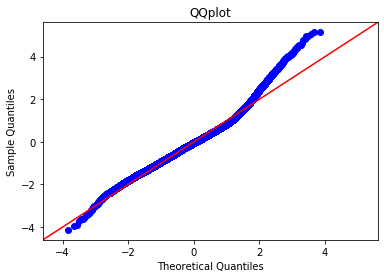

In [681]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQplot')

Deal with zipcode

In [682]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search=SearchEngine()
def zco(x):
    city=search.by_zipcode(x).city
    return city

In [683]:
df3.zipcode=[zco(x) for x in df3.zipcode]

In [684]:
df3.zipcode

0          Seattle
1          Seattle
2          Kenmore
3          Seattle
4        Sammamish
           ...    
20428      Seattle
20429      Seattle
20430      Seattle
20431      Seattle
20432     Issaquah
Name: zipcode, Length: 20433, dtype: object

In [685]:
cities=pd.get_dummies(df3.zipcode)
#I did not do drop_first because Seattle have a lot info, I will drop some later

In [686]:
df3.head()

,price,sqft_living,sqft_lot,waterfront,yr_built,zipcode,long_122_33_122_123,long_122_123_121_315,bath_0_5_2_5,lat_47_463_47_68,...,grade_3_7,bedr_1_0_3_0,view_0,flos_1_5,flos_2_0,flos_2_5,flos_3_0,con_2,con_3,con_5
0,221900.0,1180,5650,0.0,1955,Seattle,1,0,1,1,...,1,1,1,0,0,0,0,0,1,0
1,538000.0,2570,7242,0.0,1951,Seattle,1,0,1,0,...,1,1,1,0,1,0,0,0,1,0
2,180000.0,770,10000,0.0,1933,Kenmore,1,0,1,0,...,1,1,1,0,0,0,0,0,1,0
3,604000.0,1960,5000,0.0,1965,Seattle,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,510000.0,1680,8080,0.0,1987,Sammamish,0,1,1,1,...,0,1,1,0,0,0,0,0,1,0


In [687]:
df3.drop('zipcode',axis=1,inplace=True)

In [688]:
df3=pd.concat([df3,cities],axis=1)

In [689]:
df3

,price,sqft_living,sqft_lot,waterfront,yr_built,long_122_33_122_123,long_122_123_121_315,bath_0_5_2_5,lat_47_463_47_68,lat_47_68_47_778,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,221900.0,1180,5650,0.0,1955,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,2570,7242,0.0,1951,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,770,10000,0.0,1933,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,0.0,1965,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,510000.0,1680,8080,0.0,1987,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,1010000.0,3510,7200,0.0,2009,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
20429,475000.0,1310,1294,0.0,2008,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
20430,360000.0,1530,1131,0.0,2009,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
20431,400000.0,2310,5813,0.0,2014,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [690]:
df3.corr()

,price,sqft_living,sqft_lot,waterfront,yr_built,long_122_33_122_123,long_122_123_121_315,bath_0_5_2_5,lat_47_463_47_68,lat_47_68_47_778,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
price,1.000000,0.629745,0.087255,7.297501e-02,0.051753,-0.091044,0.109191,-0.340269,0.309415,0.069941,...,0.054281,0.180237,-0.027032,0.150894,-0.120258,1.771419e-01,0.012698,0.019185,-0.002788,0.075425
sqft_living,0.629745,1.000000,0.153577,6.213517e-03,0.348889,-0.052582,0.253096,-0.457880,0.033201,-0.024923,...,0.000144,0.072350,0.004806,0.117688,0.032784,1.858224e-01,-0.295272,0.089462,-0.006687,0.098737
sqft_lot,0.087255,0.153577,1.000000,2.496007e-02,0.042038,-0.121202,0.231813,-0.057225,-0.084010,-0.020214,...,-0.001946,-0.004883,0.087102,0.026730,-0.007132,5.077446e-03,-0.176675,-0.001169,0.156129,0.095722
waterfront,0.072975,0.006214,0.024960,1.000000e+00,-0.034181,-0.012409,-0.023258,-0.005519,-0.010195,-0.023497,...,-0.001150,0.004847,-0.005370,-0.006925,-0.014978,2.469566e-07,0.021157,-0.006342,0.178590,-0.007831
yr_built,0.051753,0.348889,0.042038,-3.418111e-02,1.000000,-0.079525,0.341990,-0.190565,-0.142555,-0.018545,...,-0.012917,-0.016675,0.053255,0.147860,0.086202,1.350799e-01,-0.459203,0.109268,-0.005152,0.060237
long_122_33_122_123,-0.091044,-0.052582,-0.121202,-1.240922e-02,-0.079525,1.000000,-0.575451,0.031094,-0.081967,0.031650,...,0.022073,0.096383,-0.103622,-0.112747,0.225435,-1.947402e-01,-0.048560,-0.122374,-0.073077,-0.042877
long_122_123_121_315,0.109191,0.253096,0.231813,-2.325787e-02,0.341990,-0.575451,1.000000,-0.069769,0.026421,-0.079436,...,-0.012702,-0.055463,0.180071,0.258401,-0.093519,3.384134e-01,-0.485828,0.212658,-0.041843,0.137260
bath_0_5_2_5,-0.340269,-0.457880,-0.057225,-5.518684e-03,-0.190565,0.031094,-0.069769,1.000000,-0.068646,0.012707,...,-0.003495,-0.028639,-0.002442,-0.024391,-0.003905,-6.964895e-02,0.039820,-0.041270,-0.004602,-0.018331
lat_47_463_47_68,0.309415,0.033201,-0.084010,-1.019466e-02,-0.142555,-0.081967,0.026421,-0.068646,1.000000,-0.575986,...,0.022211,0.096988,0.045372,-0.023663,0.080884,1.949881e-01,0.197911,0.122530,-0.051022,-0.150177
lat_47_68_47_778,0.069941,-0.024923,-0.020214,-2.349682e-02,-0.018545,0.031650,-0.079436,0.012707,-0.575986,1.000000,...,-0.012793,-0.055864,-0.059761,0.154901,-0.166684,-1.123104e-01,0.123798,-0.070576,-0.042145,0.260731


In [691]:
#It is hard to see what couples are over 0.65, Just create a table with values overs>0.65 and <1
coral = df3.corr().abs().stack().reset_index().sort_values(0, ascending=False)
coral['pairs'] = list(zip(coral.level_0, coral.level_1))
coral.set_index(['pairs'], inplace = True)
coral.drop(columns=['level_1', 'level_0'], inplace = True)
# cc for correlation coefficient
coral.columns = ['cc']
coral.drop_duplicates(inplace=True)
coral[(coral.cc>.65) & (coral.cc<1)]

,cc
pairs,


it is a good sign that we dont have any multicolinearity

In [692]:
#adjust columns names to fit in the model
df3.columns=df3.columns.map(lambda x: x.replace('.','_').replace(',','_').replace('[','').replace(']','').replace('(','').replace(')','').replace(' ','').replace('-',''))

In [693]:
#fit the model again
train, test =train_test_split(df3,test_size=0.2, random_state=40)
outcome='price'
x_cols=[col for col in df3.columns]
x_cols.remove('price')
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     910.8
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:36:49   Log-Likelihood:            -2.1471e+05
No. Observations:               16346   AIC:                         4.295e+05
Df Residuals:                   16304   BIC:                         4.298e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.502e+06   1.01e+05     24.785      0.000     2.3e+06     2.7e+06
sqft_living            148.7193      1.961     75.832      0.000     144.875     152.563
sqft_lot                 0.2955      0.027     11.108      0.000       0.243       0.348
waterfront            2.413e+05   1.98e+04     12.214      0.000    2.03e+05     2.8e+05
yr_built             -1228.7237     53.070    -23.153      0.000   -1332.747   -1124.701
long_122_33_122_123  -2.696e+04   2887.501     -9.338      0.000   -3.26e+04   -2.13e+04
long_122_123_121_315 -3.637e+04   5378.203     -6.763      0.000   -4.69e+04   -2.58e+04
bath_0_5_2_5         -2.757e+04   3119.281     -8.840      0.000   -3.37e+04   -2.15e+04
lat_47_463_47_68      1.127e+05   4425.893     25.460      0.000    1.04e+05    1.21e+05
lat_47_68_47_778      9.893e+04   4982.805     19.855      0.000    8.92e+04    1.09e+05
grade_3_7            -9.357e+04   2613.732    -35.798      0.000   -9.87e+04   -8.84e+04
bedr_1_0_3_0          1.354e+04   1168.464     11.592      0.000    1.13e+04    1.58e+04
view_0                1.354e+04   1168.464     11.592      0.000    1.13e+04    1.58e+04
flos_1_5              2.889e+04   3694.655      7.819      0.000    2.16e+04    3.61e+04
flos_2_0              4.151e+04   2749.158     15.098      0.000    3.61e+04    4.69e+04
flos_2_5              7.676e+04   1.32e+04      5.798      0.000    5.08e+04    1.03e+05
flos_3_0              6.333e+04   6667.947      9.498      0.000    5.03e+04    7.64e+04
con_2                -6.422e+04   1.08e+04     -5.957      0.000   -8.54e+04   -4.31e+04
con_3                -1.311e+04   2445.743     -5.361      0.000   -1.79e+04   -8317.625
con_5                 3.484e+04   3989.670      8.733      0.000     2.7e+04    4.27e+04
Auburn                8127.2995   7394.135      1.099      0.272   -6366.016    2.26e+04
Bellevue              2.268e+05   6561.740     34.561      0.000    2.14e+05     2.4e+05
BlackDiamond           9.86e+04   1.45e+04      6.789      0.000    7.01e+04    1.27e+05
Bothell               5.251e+04    1.1e+04      4.778      0.000     3.1e+04    7.41e+04
Carnation             1.425e+04   1.42e+04      1.004      0.315   -1.36e+04    4.21e+04
Duvall                1.764e+04   1.14e+04      1.551      0.121   -4654.268    3.99e+04
Enumclaw              3.684e+04   1.06e+04      3.461      0.001     1.6e+04    5.77e+04
FallCity              4.709e+04   1.69e+04      2.790      0.005     1.4e+04    8.02e+04
FederalWay           -1.847e+04   7820.967     -2.361      0.018   -3.38e+04   -3136.494
Issaquah               1.07e+05   7717.711     13.868      0.000    9.19e+04    1.22e+05
Kenmore               4.044e+04   9897.243      4.086      0.000     2.1e+04    5.98e+04
Kent                  2.615e+04   6964.194      3.755    

In [697]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

44 40
['sqft_living', 'sqft_lot', 'waterfront', 'yr_built', 'long_122_33_122_123']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.502e+06,1.01e+05,24.785,0.0,2.3e+06,2.7e+06
sqft_living,148.7193,1.961,75.832,0.0,144.875,152.563
sqft_lot,0.2955,0.027,11.108,0.0,0.243,0.348
waterfront,2.413e+05,1.98e+04,12.214,0.0,2.03e+05,2.8e+05
yr_built,-1228.7237,53.070,-23.153,0.0,-1332.747,-1124.701


In [699]:
#fit the model again
outcome='price'
x_cols=[col for col in x_cols]
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     957.6
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:41:07   Log-Likelihood:            -2.1471e+05
No. Observations:               16346   AIC:                         4.295e+05
Df Residuals:                   16306   BIC:                         4.298e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.509e+06   1.05e+05     23.863      0.000     2.3e+06    2.72e+06
sqft_living            148.7371      1.961     75.850      0.000     144.893     152.581
sqft_lot                 0.2966      0.026     11.218      0.000       0.245       0.348
waterfront            2.416e+05   1.97e+04     12.234      0.000    2.03e+05     2.8e+05
yr_built             -1227.7246     53.050    -23.143      0.000   -1331.709   -1123.741
long_122_33_122_123  -2.691e+04   2886.528     -9.324      0.000   -3.26e+04   -2.13e+04
long_122_123_121_315 -3.509e+04   5090.949     -6.893      0.000   -4.51e+04   -2.51e+04
bath_0_5_2_5         -2.754e+04   3118.908     -8.832      0.000   -3.37e+04   -2.14e+04
lat_47_463_47_68      1.139e+05   4100.966     27.772      0.000    1.06e+05    1.22e+05
lat_47_68_47_778      1.005e+05   4506.122     22.310      0.000    9.17e+04    1.09e+05
grade_3_7            -9.355e+04   2613.464    -35.794      0.000   -9.87e+04   -8.84e+04
bedr_1_0_3_0          1.355e+04   1168.197     11.601      0.000    1.13e+04    1.58e+04
view_0                1.355e+04   1168.197     11.601      0.000    1.13e+04    1.58e+04
flos_1_5              2.892e+04   3694.119      7.827      0.000    2.17e+04    3.62e+04
flos_2_0              4.152e+04   2748.208     15.107      0.000    3.61e+04    4.69e+04
flos_2_5              7.669e+04   1.32e+04      5.793      0.000    5.07e+04    1.03e+05
flos_3_0              6.316e+04   6663.663      9.478      0.000    5.01e+04    7.62e+04
con_2                 -6.41e+04   1.08e+04     -5.947      0.000   -8.52e+04    -4.3e+04
con_3                -1.306e+04   2444.771     -5.343      0.000   -1.79e+04   -8270.059
con_5                 3.481e+04   3989.058      8.725      0.000     2.7e+04    4.26e+04
Bellevue              2.159e+05   6694.710     32.246      0.000    2.03e+05    2.29e+05
BlackDiamond          8.793e+04   1.47e+04      5.962      0.000     5.9e+04    1.17e+05
Bothell               4.149e+04   1.12e+04      3.714      0.000    1.96e+04    6.34e+04
Enumclaw              2.614e+04   1.05e+04      2.480      0.013    5479.713    4.68e+04
FallCity              3.516e+04   1.76e+04      2.003      0.045     745.187    6.96e+04
FederalWay           -2.784e+04   6824.512     -4.080      0.000   -4.12e+04   -1.45e+04
Issaquah              9.521e+04   7748.065     12.288      0.000       8e+04     1.1e+05
Kenmore               2.942e+04      1e+04      2.929      0.003    9731.412    4.91e+04
Kent                   1.64e+04   5753.165      2.851      0.004    5125.661    2.77e+04
Kirkland              1.566e+05   7112.607     22.013      0.000    1.43e+05    1.71e+05
MapleValley            5.56e+04   7684.547      7.235      0.000    4.05e+04    7.07e+04
Medina                5.621e+05   4.13e+04     13.619    

In [700]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

41 39
['sqft_living', 'sqft_lot', 'waterfront', 'yr_built', 'long_122_33_122_123']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.509e+06,1.05e+05,23.863,0.0,2.3e+06,2.72e+06
sqft_living,148.7371,1.961,75.850,0.0,144.893,152.581
sqft_lot,0.2966,0.026,11.218,0.0,0.245,0.348
waterfront,2.416e+05,1.97e+04,12.234,0.0,2.03e+05,2.8e+05
yr_built,-1227.7246,53.050,-23.143,0.0,-1331.709,-1123.741


In [701]:
#fit the model again
outcome='price'
x_cols=[col for col in x_cols]
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     982.8
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:48:31   Log-Likelihood:            -2.1471e+05
No. Observations:               16346   AIC:                         4.295e+05
Df Residuals:                   16307   BIC:                         4.298e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              2.51e+06   1.05e+05     23.870      0.000     2.3e+06    2.72e+06
sqft_living            148.7713      1.960     75.908      0.000     144.930     152.613
sqft_lot                 0.2959      0.026     11.205      0.000       0.244       0.348
waterfront            2.417e+05   1.97e+04     12.241      0.000    2.03e+05     2.8e+05
yr_built             -1227.2462     53.042    -23.137      0.000   -1331.213   -1123.279
long_122_33_122_123  -2.688e+04   2885.873     -9.315      0.000   -3.25e+04   -2.12e+04
long_122_123_121_315 -3.543e+04   5053.104     -7.011      0.000   -4.53e+04   -2.55e+04
bath_0_5_2_5         -2.754e+04   3118.838     -8.831      0.000   -3.37e+04   -2.14e+04
lat_47_463_47_68      1.146e+05   3879.763     29.541      0.000    1.07e+05    1.22e+05
lat_47_68_47_778       1.01e+05   4417.665     22.866      0.000    9.24e+04     1.1e+05
grade_3_7            -9.358e+04   2612.852    -35.814      0.000   -9.87e+04   -8.85e+04
bedr_1_0_3_0          1.355e+04   1168.120     11.597      0.000    1.13e+04    1.58e+04
view_0                1.355e+04   1168.120     11.597      0.000    1.13e+04    1.58e+04
flos_1_5              2.883e+04   3690.635      7.812      0.000    2.16e+04    3.61e+04
flos_2_0              4.142e+04   2742.754     15.103      0.000     3.6e+04    4.68e+04
flos_2_5              7.651e+04   1.32e+04      5.781      0.000    5.06e+04    1.02e+05
flos_3_0              6.309e+04   6662.303      9.470      0.000       5e+04    7.61e+04
con_2                -6.411e+04   1.08e+04     -5.948      0.000   -8.52e+04    -4.3e+04
con_3                -1.309e+04   2444.060     -5.357      0.000   -1.79e+04   -8302.043
con_5                 3.484e+04   3988.350      8.736      0.000     2.7e+04    4.27e+04
Bellevue              2.137e+05   5347.164     39.966      0.000    2.03e+05    2.24e+05
BlackDiamond          8.681e+04   1.46e+04      5.945      0.000    5.82e+04    1.15e+05
Bothell                3.95e+04   1.05e+04      3.746      0.000    1.88e+04    6.02e+04
Enumclaw              2.504e+04   1.03e+04      2.421      0.015    4769.177    4.53e+04
FallCity              3.335e+04   1.72e+04      1.935      0.053    -428.620    6.71e+04
FederalWay           -2.934e+04   6232.422     -4.708      0.000   -4.16e+04   -1.71e+04
Issaquah              9.339e+04   6978.439     13.383      0.000    7.97e+04    1.07e+05
Kenmore               2.743e+04   9341.172      2.936      0.003    9118.514    4.57e+04
Kent                  1.499e+04   5124.433      2.925      0.003    4947.031     2.5e+04
Kirkland              1.545e+05   6025.655     25.646      0.000    1.43e+05    1.66e+05
MapleValley           5.448e+04   7400.638      7.362      0.000       4e+04     6.9e+04
Medina                5.599e+05   4.11e+04     13.634    

In [702]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

40 38
['sqft_living', 'sqft_lot', 'waterfront', 'yr_built', 'long_122_33_122_123']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.51e+06,1.05e+05,23.870,0.0,2.3e+06,2.72e+06
sqft_living,148.7713,1.960,75.908,0.0,144.930,152.613
sqft_lot,0.2959,0.026,11.205,0.0,0.244,0.348
waterfront,2.417e+05,1.97e+04,12.241,0.0,2.03e+05,2.8e+05
yr_built,-1227.2462,53.042,-23.137,0.0,-1331.213,-1123.279


In [703]:
#fit the model again
outcome='price'
x_cols=[col for col in x_cols]
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1009.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:49:02   Log-Likelihood:            -2.1471e+05
No. Observations:               16346   AIC:                         4.295e+05
Df Residuals:                   16308   BIC:                         4.298e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.513e+06   1.05e+05     23.910      0.000    2.31e+06    2.72e+06
sqft_living            148.7783      1.960     75.906      0.000     144.936     152.620
sqft_lot                 0.2994      0.026     11.362      0.000       0.248       0.351
waterfront            2.418e+05   1.97e+04     12.245      0.000    2.03e+05    2.81e+05
yr_built             -1229.1927     53.036    -23.176      0.000   -1333.150   -1125.236
long_122_33_122_123  -2.685e+04   2886.070     -9.303      0.000   -3.25e+04   -2.12e+04
long_122_123_121_315 -3.399e+04   4998.786     -6.800      0.000   -4.38e+04   -2.42e+04
bath_0_5_2_5         -2.752e+04   3119.086     -8.824      0.000   -3.36e+04   -2.14e+04
lat_47_463_47_68      1.154e+05   3858.663     29.906      0.000    1.08e+05    1.23e+05
lat_47_68_47_778      1.015e+05   4411.379     23.005      0.000    9.28e+04     1.1e+05
grade_3_7            -9.359e+04   2613.065    -35.816      0.000   -9.87e+04   -8.85e+04
bedr_1_0_3_0          1.358e+04   1168.084     11.626      0.000    1.13e+04    1.59e+04
view_0                1.358e+04   1168.084     11.626      0.000    1.13e+04    1.59e+04
flos_1_5              2.888e+04   3690.856      7.825      0.000    2.16e+04    3.61e+04
flos_2_0              4.134e+04   2742.605     15.072      0.000     3.6e+04    4.67e+04
flos_2_5              7.634e+04   1.32e+04      5.768      0.000    5.04e+04    1.02e+05
flos_3_0              6.314e+04   6662.823      9.476      0.000    5.01e+04    7.62e+04
con_2                -6.418e+04   1.08e+04     -5.954      0.000   -8.53e+04   -4.31e+04
con_3                -1.308e+04   2444.255     -5.351      0.000   -1.79e+04   -8287.795
con_5                 3.469e+04   3987.932      8.700      0.000    2.69e+04    4.25e+04
Bellevue              2.124e+05   5306.414     40.031      0.000    2.02e+05    2.23e+05
BlackDiamond          8.516e+04   1.46e+04      5.842      0.000    5.66e+04    1.14e+05
Bothell                3.89e+04   1.05e+04      3.691      0.000    1.82e+04    5.96e+04
Enumclaw              2.324e+04   1.03e+04      2.257      0.024    3053.485    4.34e+04
FederalWay           -2.947e+04   6232.609     -4.728      0.000   -4.17e+04   -1.73e+04
Issaquah              9.112e+04   6879.967     13.245      0.000    7.76e+04    1.05e+05
Kenmore               2.682e+04   9336.664      2.873      0.004    8518.827    4.51e+04
Kent                  1.449e+04   5118.194      2.830      0.005    4453.422    2.45e+04
Kirkland              1.539e+05   6016.605     25.575      0.000    1.42e+05    1.66e+05
MapleValley           5.294e+04   7358.531      7.195      0.000    3.85e+04    6.74e+04
Medina                5.589e+05   4.11e+04     13.610      0.000    4.78e+05    6.39e+05
MercerIsland          3.328e+05    1.1e+04     30.171    

In [704]:
# I set my train and test variables and fit my training set to the model
X_train = train[x_cols]
y_train = train['price']
X_test = test[x_cols]
y_test = test['price']

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)


train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 15018838401.300022
Test Mean Squared Error 13403779679.611578
Root Train Mean Squared Error 122551.37045867754
Root Test Mean Squared Error 115774.69360620902


Text(0.5, 1.0, 'QQplot')

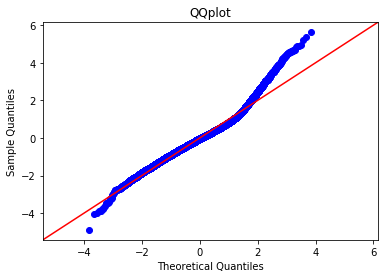

In [705]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQplot')

The residual does not fit perfectly on the line. The outliers in the tail that tell us 
It is a right skewed (or positive skewed). May need to log transform to solve it.

Compare the third model to the base model. The R2 and RMSE are almost the same, but on the third model, I already solved all problems, such as: multicollinearity, high correlation and dummy variable.


Base on my experience, third model is the best model I have made. I used to do some log transfer before but it even made my model worse. However, I will try again with log transform and let see it can help my model to normalization

In [707]:
#just want to prevent my info
df3.to_csv('3rd_data.csv')

# Fourth model

Before doing log transform, I want to see what variables i should

In [791]:
df4=pd.read_csv('3rd_data.csv')

In [792]:
df4.head()

,Unnamed: 0,price,sqft_living,sqft_lot,waterfront,yr_built,long_122_33_122_123,long_122_123_121_315,bath_0_5_2_5,lat_47_463_47_68,...,Medina,MercerIsland,NorthBend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,0,221900.0,1180,5650,0.0,1955,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,1,538000.0,2570,7242,0.0,1951,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,180000.0,770,10000,0.0,1933,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,604000.0,1960,5000,0.0,1965,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,510000.0,1680,8080,0.0,1987,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [782]:
conts=['price','sqft_living','sqft_lot']

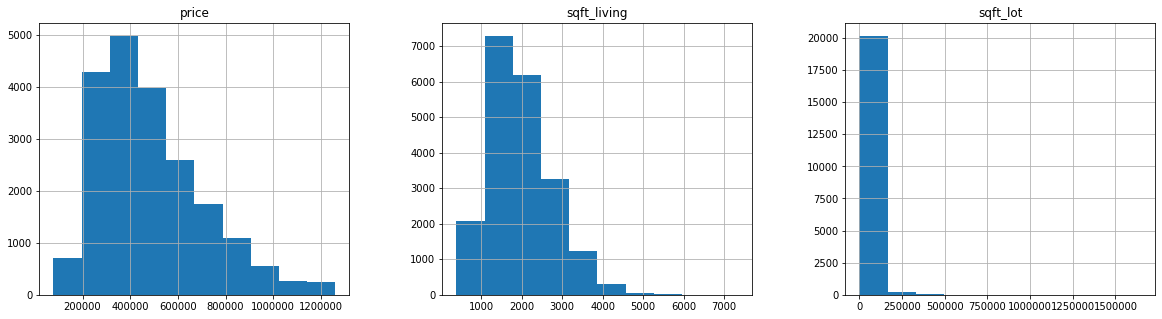

In [783]:
fig, ax =plt.subplots(1,3, figsize=[20,5])
df4[conts].hist(ax=ax)
plt.show()

I do not want to log price, because it is hard to interpret. So, I just do it on sqft_living and sqft_lot first and see what will happen

In [793]:
df4.sqft_living=df4.sqft_living.map(lambda x:np.log(x))

In [800]:
df4.sqft_lot=df4.sqft_lot.map(lambda x:np.log(x))

In [794]:
df4.head()

,Unnamed: 0,price,sqft_living,sqft_lot,waterfront,yr_built,long_122_33_122_123,long_122_123_121_315,bath_0_5_2_5,lat_47_463_47_68,...,Medina,MercerIsland,NorthBend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,0,221900.0,7.073270,5650,0.0,1955,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,1,538000.0,7.851661,7242,0.0,1951,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,180000.0,6.646391,10000,0.0,1933,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,604000.0,7.580700,5000,0.0,1965,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,510000.0,7.426549,8080,0.0,1987,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0


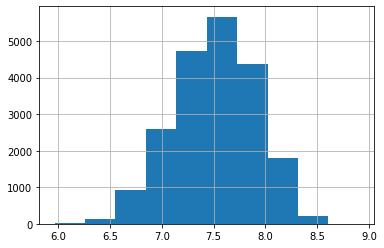

In [786]:
df4.sqft_living.hist()

In [796]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [797]:
df4.sqft_living=norm_feat(df4.sqft_living)

In [802]:
df4.sqft_lot=norm_feat(df4.sqft_lot)

In [798]:
df4.head()

,Unnamed: 0,price,sqft_living,sqft_lot,waterfront,yr_built,long_122_33_122_123,long_122_123_121_315,bath_0_5_2_5,lat_47_463_47_68,...,Medina,MercerIsland,NorthBend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,0,221900.0,-1.124999,5650,0.0,1955,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,1,538000.0,0.854230,7242,0.0,1951,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,180000.0,-2.210432,10000,0.0,1933,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,604000.0,0.165252,5000,0.0,1965,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,510000.0,-0.226710,8080,0.0,1987,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [799]:
df4.drop('Unnamed: 0', axis=1, inplace=True)

In [803]:
df4.head()

,price,sqft_living,sqft_lot,waterfront,yr_built,long_122_33_122_123,long_122_123_121_315,bath_0_5_2_5,lat_47_463_47_68,lat_47_68_47_778,...,Medina,MercerIsland,NorthBend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,221900.0,-1.124999,-0.362543,0.0,1955,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,0.854230,-0.084434,0.0,1951,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,-2.210432,0.277078,0.0,1933,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.165252,-0.499465,0.0,1965,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,510000.0,-0.226710,0.038234,0.0,1987,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [804]:
train, test =train_test_split(df4,test_size=0.2, random_state=40)
outcome='price'
x_cols=[col for col in df3.columns]
x_cols.remove('price')
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     842.9
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:54:11   Log-Likelihood:            -2.1514e+05
No. Observations:               16346   AIC:                         4.304e+05
Df Residuals:                   16304   BIC:                         4.307e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.966e+06   1.05e+05     28.140      0.000    2.76e+06    3.17e+06
sqft_living           1.018e+05   1573.242     64.732      0.000    9.88e+04    1.05e+05
sqft_lot              1.022e+04   1374.327      7.435      0.000    7524.397    1.29e+04
waterfront            2.281e+05   2.03e+04     11.241      0.000    1.88e+05    2.68e+05
yr_built             -1312.0863     55.393    -23.687      0.000   -1420.663   -1203.510
long_122_33_122_123  -2.932e+04   2967.702     -9.878      0.000   -3.51e+04   -2.35e+04
long_122_123_121_315 -3.198e+04   5550.066     -5.762      0.000   -4.29e+04   -2.11e+04
bath_0_5_2_5         -5.212e+04   3129.412    -16.655      0.000   -5.83e+04    -4.6e+04
lat_47_463_47_68      1.156e+05   4588.202     25.199      0.000    1.07e+05    1.25e+05
lat_47_68_47_778      1.005e+05   5131.244     19.579      0.000    9.04e+04    1.11e+05
grade_3_7            -9.955e+04   2683.992    -37.091      0.000   -1.05e+05   -9.43e+04
bedr_1_0_3_0          1.105e+04   1196.993      9.235      0.000    8708.545    1.34e+04
view_0                1.105e+04   1196.993      9.235      0.000    8708.545    1.34e+04
flos_1_5              2.383e+04   3823.788      6.232      0.000    1.63e+04    3.13e+04
flos_2_0              4.834e+04   2912.316     16.600      0.000    4.26e+04    5.41e+04
flos_2_5              8.861e+04   1.37e+04      6.492      0.000    6.19e+04    1.15e+05
flos_3_0              6.982e+04   7062.068      9.887      0.000     5.6e+04    8.37e+04
con_2                -5.362e+04   1.11e+04     -4.836      0.000   -7.54e+04   -3.19e+04
con_3                -1.012e+04   2514.074     -4.027      0.000   -1.51e+04   -5196.336
con_5                 3.375e+04   4102.947      8.225      0.000    2.57e+04    4.18e+04
Auburn                2.648e+04   7615.604      3.477      0.001    1.15e+04    4.14e+04
Bellevue              2.454e+05   6747.770     36.367      0.000    2.32e+05    2.59e+05
BlackDiamond          1.209e+05   1.49e+04      8.089      0.000    9.16e+04     1.5e+05
Bothell               7.114e+04   1.13e+04      6.296      0.000     4.9e+04    9.33e+04
Carnation             3.974e+04   1.47e+04      2.712      0.007     1.1e+04    6.85e+04
Duvall                 3.17e+04   1.17e+04      2.706      0.007    8739.847    5.47e+04
Enumclaw              6.307e+04   1.09e+04      5.776      0.000    4.17e+04    8.45e+04
FallCity              6.895e+04   1.74e+04      3.953      0.000    3.48e+04    1.03e+05
FederalWay           -1761.4092   8036.296     -0.219      0.827   -1.75e+04     1.4e+04
Issaquah              1.219e+05   7931.224     15.373      0.000    1.06e+05    1.37e+05
Kenmore               5.602e+04   1.02e+04      5.502      0.000    3.61e+04     7.6e+04
Kent                  4.462e+04   7161.861      6.230    

In [805]:
# I set my train and test variables and fit my training set to the model
X_train = train[x_cols]
y_train = train['price']
X_test = test[x_cols]
y_test = test['price']

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)


train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 15836682265.448206
Test Mean Squared Error 14215063039.314108
Root Train Mean Squared Error 125843.88052443475
Root Test Mean Squared Error 119226.93923486465


Text(0.5, 1.0, 'QQplot')

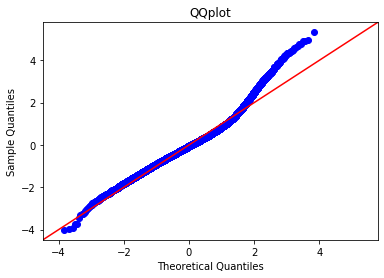

In [806]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQplot')

after logging sqft_living and sqft_lot, the model is the same. Now, I will log dependent valiable

In [807]:
df4.price=df4.price.map(lambda x:np.log(x))

In [808]:
df4.price=norm_feat(df4.price)

In [809]:
df4.head()

,price,sqft_living,sqft_lot,waterfront,yr_built,long_122_33_122_123,long_122_123_121_315,bath_0_5_2_5,lat_47_463_47_68,lat_47_68_47_778,...,Medina,MercerIsland,NorthBend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,-1.493690,-1.124999,-0.362543,0.0,1955,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.453745,0.854230,-0.084434,0.0,1951,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,-1.953859,-2.210432,0.277078,0.0,1933,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.708194,0.165252,-0.499465,0.0,1965,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.336217,-0.226710,0.038234,0.0,1987,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [810]:
train, test =train_test_split(df4,test_size=0.2, random_state=40)
outcome='price'
x_cols=[col for col in df3.columns]
x_cols.remove('price')
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     974.9
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:57:54   Log-Likelihood:                -13160.
No. Observations:               16346   AIC:                         2.640e+04
Df Residuals:                   16304   BIC:                         2.673e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.2825      0.453     20.478      0.000       8.394      10.171
sqft_living              0.4929      0.007     72.847      0.000       0.480       0.506
sqft_lot                 0.0217      0.006      3.678      0.000       0.010       0.033
waterfront               0.8650      0.087      9.910      0.000       0.694       1.036
yr_built                -0.0049      0.000    -20.708      0.000      -0.005      -0.004
long_122_33_122_123     -0.1660      0.013    -13.005      0.000      -0.191      -0.141
long_122_123_121_315    -0.1500      0.024     -6.286      0.000      -0.197      -0.103
bath_0_5_2_5            -0.1147      0.013     -8.522      0.000      -0.141      -0.088
lat_47_463_47_68         0.5831      0.020     29.549      0.000       0.544       0.622
lat_47_68_47_778         0.6107      0.022     27.671      0.000       0.567       0.654
grade_3_7               -0.4451      0.012    -38.554      0.000      -0.468      -0.422
bedr_1_0_3_0             0.0496      0.005      9.640      0.000       0.040       0.060
view_0                   0.0496      0.005      9.640      0.000       0.040       0.060
flos_1_5                 0.1213      0.016      7.373      0.000       0.089       0.153
flos_2_0                 0.1903      0.013     15.192      0.000       0.166       0.215
flos_2_5                 0.3090      0.059      5.264      0.000       0.194       0.424
flos_3_0                 0.3064      0.030     10.088      0.000       0.247       0.366
con_2                   -0.4567      0.048     -9.578      0.000      -0.550      -0.363
con_3                   -0.0645      0.011     -5.963      0.000      -0.086      -0.043
con_5                    0.1372      0.018      7.778      0.000       0.103       0.172
Auburn                  -0.1214      0.033     -3.707      0.000      -0.186      -0.057
Bellevue                 0.8985      0.029     30.958      0.000       0.842       0.955
BlackDiamond             0.4228      0.064      6.577      0.000       0.297       0.549
Bothell                  0.2335      0.049      4.804      0.000       0.138       0.329
Carnation                0.0024      0.063      0.039      0.969      -0.121       0.126
Duvall                  -0.0122      0.050     -0.242      0.809      -0.111       0.087
Enumclaw                 0.1209      0.047      2.574      0.010       0.029       0.213
FallCity                 0.2629      0.075      3.504      0.000       0.116       0.410
FederalWay              -0.2644      0.035     -7.648      0.000      -0.332      -0.197
Issaquah                 0.4636      0.034     13.591      0.000       0.397       0.530
Kenmore                  0.1463      0.044      3.341      0.001       0.060       0.232
Kent                     0.0114      0.031      0.369    

In [811]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

44 39
['sqft_living', 'sqft_lot', 'waterfront', 'yr_built', 'long_122_33_122_123']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,9.2825,0.453,20.478,0.0,8.394,10.171
sqft_living,0.4929,0.007,72.847,0.0,0.480,0.506
sqft_lot,0.0217,0.006,3.678,0.0,0.010,0.033
waterfront,0.8650,0.087,9.910,0.0,0.694,1.036
yr_built,-0.0049,0.000,-20.708,0.0,-0.005,-0.004


In [812]:
#fit the model again
outcome='price'
x_cols=[col for col in x_cols]
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1052.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:59:16   Log-Likelihood:                -13161.
No. Observations:               16346   AIC:                         2.640e+04
Df Residuals:                   16307   BIC:                         2.670e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.3094      0.472     19.720      0.000       8.384      10.235
sqft_living              0.4930      0.007     72.897      0.000       0.480       0.506
sqft_lot                 0.0217      0.006      3.699      0.000       0.010       0.033
waterfront               0.8658      0.087      9.923      0.000       0.695       1.037
yr_built                -0.0049      0.000    -20.723      0.000      -0.005      -0.004
long_122_33_122_123     -0.1657      0.013    -12.992      0.000      -0.191      -0.141
long_122_123_121_315    -0.1588      0.023     -7.037      0.000      -0.203      -0.115
bath_0_5_2_5            -0.1150      0.013     -8.543      0.000      -0.141      -0.089
lat_47_463_47_68         0.5890      0.017     34.931      0.000       0.556       0.622
lat_47_68_47_778         0.6132      0.019     32.104      0.000       0.576       0.651
grade_3_7               -0.4455      0.012    -38.609      0.000      -0.468      -0.423
bedr_1_0_3_0             0.0495      0.005      9.620      0.000       0.039       0.060
view_0                   0.0495      0.005      9.620      0.000       0.039       0.060
flos_1_5                 0.1203      0.016      7.326      0.000       0.088       0.153
flos_2_0                 0.1894      0.013     15.142      0.000       0.165       0.214
flos_2_5                 0.3077      0.059      5.242      0.000       0.193       0.423
flos_3_0                 0.3060      0.030     10.077      0.000       0.246       0.365
con_2                   -0.4570      0.048     -9.586      0.000      -0.550      -0.364
con_3                   -0.0647      0.011     -5.991      0.000      -0.086      -0.044
con_5                    0.1376      0.018      7.799      0.000       0.103       0.172
Auburn                  -0.1453      0.024     -5.977      0.000      -0.193      -0.098
Bellevue                 0.8698      0.024     36.956      0.000       0.824       0.916
BlackDiamond             0.4074      0.064      6.373      0.000       0.282       0.533
Bothell                  0.2064      0.047      4.427      0.000       0.115       0.298
Enumclaw                 0.1054      0.045      2.361      0.018       0.018       0.193
FallCity                 0.2417      0.076      3.172      0.002       0.092       0.391
FederalWay              -0.2889      0.027    -10.584      0.000      -0.342      -0.235
Issaquah                 0.4425      0.031     14.481      0.000       0.383       0.502
Kenmore                  0.1192      0.041      2.884      0.004       0.038       0.200
Kirkland                 0.6420      0.027     24.044      0.000       0.590       0.694
MapleValley              0.2629      0.032      8.326      0.000       0.201       0.325
Medina                   1.9339      0.181     10.660    

In [813]:
X_train = train[x_cols]
y_train = train['price']
X_test = test[x_cols]
y_test = test['price']

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)


train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 0.29299483200672155
Test Mean Squared Error 0.27302870060676643
Root Train Mean Squared Error 0.5412899703548196
Root Test Mean Squared Error 0.5225214833925649


Text(0.5, 1.0, 'QQplot')

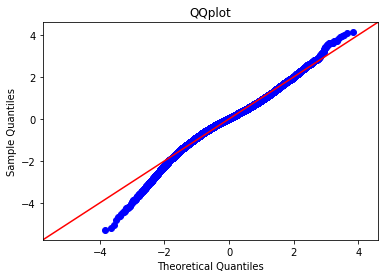

In [814]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQplot')

Even R2 is better, but this model with log dependent is complicated to interpret, and the qq plot now left skewed. It is more complicated

So, I decided to take Third Model is the Final model with R_squared :0.697 and RMSE :115000